# Analysing Customer Churn Dataset


In [ ]:
!ls

best_rf_model.pkl					   sample_data
datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv


In this data, we'll analyze customer churn data, and find out how we can derive important insights to develop strategies for customer retention.

Churning in business is a phenomenon where a customer stops availing/subscribing for the service of any particular organization. So it is a loss scenario for that organization. So the organization should look in depth what are the causes that are isolating them from their customers.

Types of churns:

a. **Contractual Churn:** When a customer is under a contract but suddenly stops/cancels the contract. It's also called **Voluntary Churn**. Eg: Suddenly cancelling the subscription of cable TV.

b. **Non-contractual Churn:** The customer is not under the contract of a service. Eg: After expirition of a service, eg: prepaid phone service or cable service you don't renew their service again. It also includes sudden stop of service from organization end. Eg: the organization suddenly stops a particular plan due to some unavoidable issue. It is also called **involuntary churn**.

The causes of churning can be many eg: high price, bad service or poor product quality, misbehavior or harrassment to customers from organization's side, strong competitors etc. 

So the organization hires Data Scientist/ Data Analyst whose one task among all is to identify the potential causes of churning and help formulating ideas to retain and acquire customers.

The data set includes information about:

**Customers who left within the last month** – the column is called Churn

**Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

**Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

**Demographic info about customers** – gender, age range, and if they have partners and dependents

In [ ]:
# Importing necessary libraries and the dataset
import pandas as pd
import numpy as np
df=pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Notice one thing in the above dataframe, the customer sensitive information like Phone no., name etc are missing. These are sensitive information and only be accessed when absolutely necesary. Otherwise we should anonymise them as done in above dataframe with customerID column. 

Mishandling of sensitive data might lead to loss of reputation and business by the organization.

In [ ]:
# creating a copy of the dataset for future reference
df_c=df.copy()
df.drop(['customerID'],axis=1,inplace=True)

# Exploratory & Statistical Data Analysis

Good starting point of analysis of churn dataset is to create **neat plots** and do **statistical analysis** and understand the data and get meaningful inference.

In [ ]:
df1=df[['PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','Churn']]
col_name=df1.columns.tolist()
col_name.pop()

'Churn'

In [ ]:
col_name

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']

Here we will observe the **proportion of customers(churners and non-churners)** of each service category for each type-churners and non churners in tabular format. Observe that the output contains both tabular result and also barplot are created from them for easy visualization and analysis.

Here we used **proportions(normalization of frequency distribution for each type)** because the total number of customers for each service is different so it's unfair to compare them in same scale.

PhoneService,No,Yes
Churn,,
No,0.072696,0.661934
Yes,0.024137,0.241232


MultipleLines,No,No phone service,Yes
Churn,,,
No,0.360784,0.072696,0.301150
Yes,0.120545,0.024137,0.120687


InternetService,DSL,Fiber optic,No
Churn,,,
No,0.278574,0.255431,0.200625
Yes,0.065171,0.184154,0.016044


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,0.289223,0.200625,0.244782
Yes,0.207440,0.016044,0.041886


DeviceProtection,No,No internet service,Yes
Churn,,,
No,0.267500,0.200625,0.266506
Yes,0.171944,0.016044,0.077382


TechSupport,No,No internet service,Yes
Churn,,,
No,0.287803,0.200625,0.246202
Yes,0.205310,0.016044,0.044015


StreamingTV,No,No internet service,Yes
Churn,,,
No,0.265228,0.200625,0.268778
Yes,0.133750,0.016044,0.115576


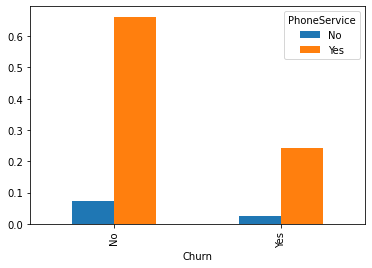

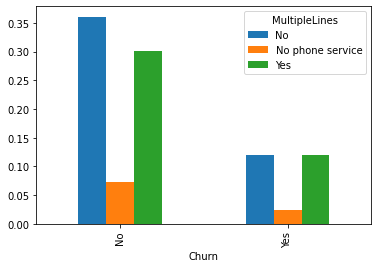

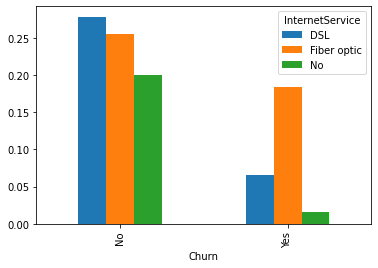

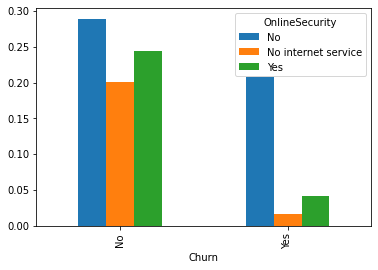

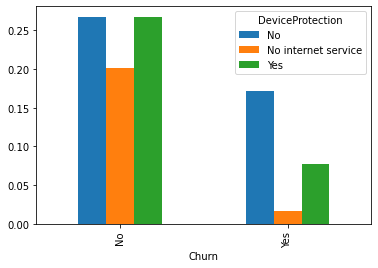

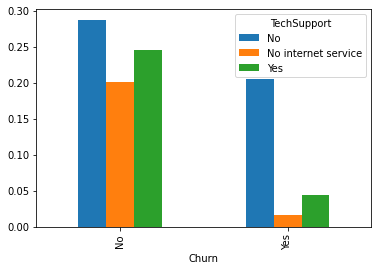

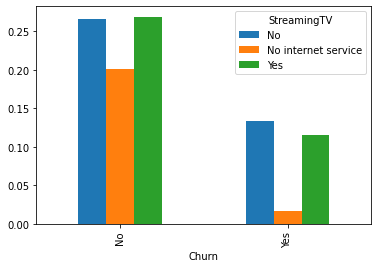

In [ ]:
import matplotlib.pyplot as plt
for i in col_name:
     display(pd.crosstab(index=df1['Churn'],columns=[df[i]],normalize=True))
     pd.crosstab(index=df1['Churn'],columns=[df[i]],normalize=True).plot(kind='bar')

For each type of service we need to observe the bar-plot distribution for both churners and non-churners. If we see the distribution looks **different** for both we can conclude that the churners are mostly from that particular service. 

We have to then **look deeply** into that service and **improve** it's demerits and prevent customer churning from it.

**Eg:** We can see that the **PhoneService** plot looks same for churners and non-churners. Again if we see in case of **InternetService**, among churners, fiber-optic users are highest whereas DSL users are highest among non-churners.

Well, from visual analysis,it is not always possible to determine difference between two distributions. Also it is not possible to know that if the difference occured by chance or there is significant difference between two distributions.

We will perform **Chi-Square Test of Independence** here. It tests whether two or more groups are statistically independent or not.

**H0(Null Hypothesis):** There is no difference between churners and non-churners for that particular service(they are **independent**).

**HA(Alternate Hypothesis):** There is significant difference between churners and non-churners for that particular service(they are **dependent**).

If we find that the null hypothesis is true then we will depict that particular service is not responsible for churning, but if alternate hypothesis is true then we have to conclude there is difference among churners and non-churners for that particular service. So we need to focus on improving those services more.

if **p-value** is less than **0.05** we will **reject null hypothesis in favour of alternate hypothesis** with 95% significance level.

In [ ]:
from scipy import stats
for i in col_name:
     display(pd.crosstab(index=df1['Churn'],columns=[df[i]]))
     t_stat,p_val,_,_=(stats.chi2_contingency([pd.crosstab(index=df1['Churn'],columns=[df[i]]).iloc[0].values,pd.crosstab(index=df1['Churn'],columns=[df[i]]).iloc[1].values]))
     print('Test-Statistic is {} and p-value is {}'.format(t_stat,p_val))
  #  print(arr)

PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699


Test-Statistic is 0.9150329892546948 and p-value is 0.3387825358066928


MultipleLines,No,No phone service,Yes
Churn,,,
No,2541,512,2121
Yes,849,170,850


Test-Statistic is 11.33044148319756 and p-value is 0.0034643829548773


InternetService,DSL,Fiber optic,No
Churn,,,
No,1962,1799,1413
Yes,459,1297,113


Test-Statistic is 732.309589667794 and p-value is 9.571788222840544e-160


OnlineSecurity,No,No internet service,Yes
Churn,,,
No,2037,1413,1724
Yes,1461,113,295


Test-Statistic is 849.9989679615962 and p-value is 2.6611496351768565e-185


DeviceProtection,No,No internet service,Yes
Churn,,,
No,1884,1413,1877
Yes,1211,113,545


Test-Statistic is 558.419369407389 and p-value is 5.505219496457244e-122


TechSupport,No,No internet service,Yes
Churn,,,
No,2027,1413,1734
Yes,1446,113,310


Test-Statistic is 828.1970684587393 and p-value is 1.4430840279999813e-180


StreamingTV,No,No internet service,Yes
Churn,,,
No,1868,1413,1893
Yes,942,113,814


Test-Statistic is 374.20394331098134 and p-value is 5.528994485739024e-82


Here we can see that, except for **PhoneService** we reject null hypothesis in favor of alternate hypothesis as hinted from the barplots.

So **PhoneService** is the only service which is perfect i.e, free from churning.

In [ ]:
np.array([pd.crosstab(index=df1['Churn'],columns=[df[i]],normalize=True).iloc[0].values])

array([[0.26522789, 0.20062473, 0.26877751]])

Let us observe the **difference between the monthly charges** paid by both churners and non-churners.

In [ ]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

Here we will again perform **hypothesis test(one-way ANOVA test)** to see if there is significant difference in monthly charges paid among churners and non-churners.

**H0:** The groups(churners & non-churners) have same mean of MonthlyCharges.

**HA:** The groups(churners & non-churners) have different mean of MonthlyCharges.

Here also we will check whether the **p-value** is less than **0.05**.


**Note:** *Choosing the right type of hypothesis test needs little bit of knowledge about them. So better read some article on statistical test before performing any hypothesis test.*

In [ ]:
from scipy import stats
churn_y=df[df['Churn']=='Yes']
churn_n=df[df['Churn']=='No']
stats.f_oneway(churn_y['MonthlyCharges'],churn_n['MonthlyCharges'])

F_onewayResult(statistic=273.4637042077133, pvalue=2.7066456068950115e-60)

From the p-value it is evident that the **MonthlyCharges** means are significanty  **different** as hinted from previous cell.

Here, we'll check that if the churners are more for a particular gender(**gender-denpendence**). Here we will use **barplot** again to see the distribution of churners and non-churners among both genders.

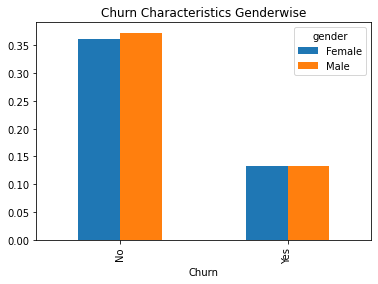

In [ ]:
pd.crosstab(index=df1['Churn'],columns=[df['gender']],normalize=True).plot(kind='bar',title='Churn Characteristics Genderwise')

We see from the above barplot that there is **no significant differnece among males and females in churning.**

*We can also perform hypothesis test here if we want to.*

Now we will analyse **three features** (*tenure, MonthlyCharges and Contracts*) together.

In [ ]:
# Lets see how tenure differs along churners and non-churners.
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

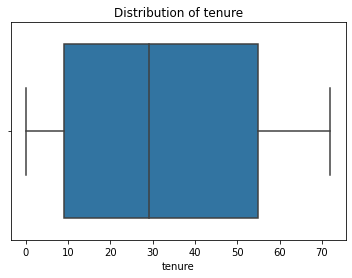

In [ ]:
# Visualize the distribution with boxplot
import seaborn as sns
sns.boxplot(df['tenure'])
title=plt.title('Distribution of tenure')

In [ ]:
# Checking the min, mean and max values of tenure
print(df['tenure'].min(),df['tenure'].mean(),df['tenure'].max())

0 32.37114865824223 72


We divide the tenure into 3 categories- **Low tenure(0-20 months), Medium tenure(21-40 months) and Long tenure(41-72 months).**

The months for each category are chose after careful observation of overall distribution and the min, mean and max values.

In [ ]:
bins=[0,21,41,73]
bin_names = ['Low tenure','Medium tenure','Long tenure']
cats = pd.cut(df['tenure'], bins,right=False,labels=bin_names)
cats

0          Low tenure
1       Medium tenure
2          Low tenure
3         Long tenure
4          Low tenure
            ...      
7038    Medium tenure
7039      Long tenure
7040       Low tenure
7041       Low tenure
7042      Long tenure
Name: tenure, Length: 7043, dtype: category
Categories (3, object): [Low tenure < Medium tenure < Long tenure]

In [ ]:
df['tenure_cats']=cats
df['tenure_cats']=df['tenure_cats'].astype('object')

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_cats
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low tenure
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Medium tenure
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low tenure
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Long tenure
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Low tenure


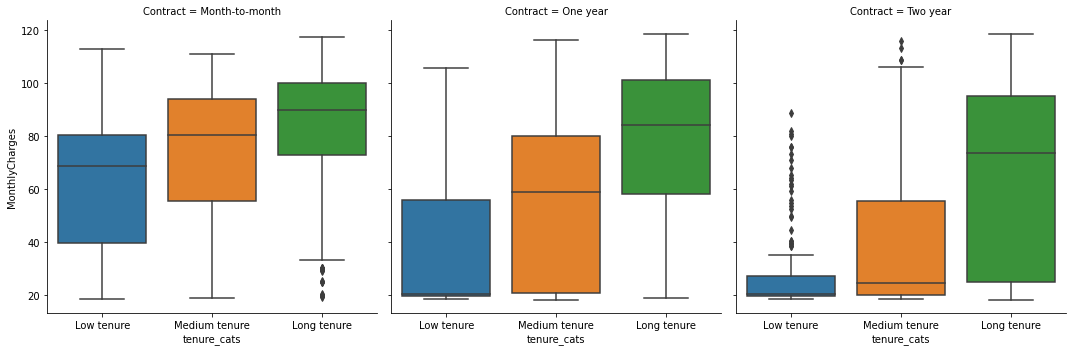

In [ ]:
# Plotting their distribution using multiple-boxplot for visualization and analysis
import seaborn as sns
ax=sns.catplot(kind='box',y='MonthlyCharges',x='tenure_cats',col='Contract',data=df)

**Note: we will refer to monthly charges payable by a customer as package.**

Well in all three subplots we see a common pattern that the **median package subscribed is higher for long tenure**. The size of the box (denoting 25-75 percentile of data) denotes the **variablity** in the data. So for Two-year contract, the large green box describes that the customers subscribed to long range of packages from low to high.The black dots outside box denotes outliers. Eg: for 2-year contact, though low-tenured people mostly takes lower package but there are outliers suggesting some took higher packages as well.

We have to focus on increasing subscription value(package) of those who are low-tenured by giving them special discounts/offers etc and improving their trust. Apart from need and financial condition, subscription to higher package also denotes that customers have enough faith on us to buy high subscription so they are non-churners.

# Using Probability Theory to Analyse Data

We can use **probability Theories** to get the desired output/insight we want for our analysis. Here we will analyse given **a subscriber/customer has dependents or partner, what is the probability that he will churn?**

We use **properties of Conditional Probability** for this purpose.



![alt text](https://drive.google.com/uc?id=1aknyW-O5kha_ecdns9ctBIPPg-2L_Iuk)

In [ ]:
A=df['Partner'].value_counts(normalize=True).values[1]


In [ ]:
B=df['Dependents'].value_counts(normalize=True).values[1]

In [ ]:
A_intersec_B=len(df.query("Partner=='Yes' and Dependents=='Yes'"))/len(df)

In [ ]:
A_UNION_B=A+B-A_intersec_B

In [ ]:
Ch=df['Churn'].value_counts(normalize=True).values[1]

In [ ]:
prob=(Ch*A_UNION_B)/A_UNION_B
print(prob)

0.2653698707936959


From result, we can see that the customer will have **26.5%** chance to churn given he has Partner or Dependants.

# Building Machine Learning Model to Predict Churners

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_cats'],
      dtype='object')

In [ ]:
df.drop(['tenure_cats'],axis=1,inplace=True)

In [ ]:
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
df_col=df.select_dtypes('object').columns.tolist()
df_col.pop()
df_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],downcast='float',errors='coerce')

In [ ]:
df.TotalCharges.fillna(0,inplace=True)

In [ ]:
df_col.pop()

'TotalCharges'

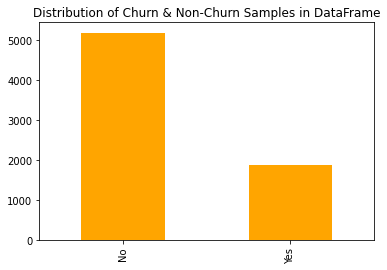

In [ ]:
# We check the total frequency of churners and non-churners in the dataset
df['Churn'].value_counts().plot(kind='bar',color='orange',title='Distribution of Churn & Non-Churn Samples in DataFrame')

We see that there is a big difference between churners and non-churners in the dataset. If we fit this data as it is, then the ML model will be very much **biased** towards the 'No' or non-churners.

We ne need to do something here. So if we build a ML model on this biased data then even a useless model if predicts all classes as '**No**' then also it will be correct about ***70% times*** due to the imbalance. **So always we have to check the distribution of target variable before jumping into making ML models.**

In [ ]:
# Convert all the string features to numerical features per string column with a particular numerical value representing a particular feature. We could also perform one-hot encoding but since in that case
# the number of features will be very high in this case and the model will become computationally expensive and time-taking. So we choose label encoding here.
for i in df_col:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.750000,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,Yes


In [ ]:
# Dividing dataset into features and target data
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [ ]:
# Splitting the dataset into training and testing set. We will fit/train our ML model on our training data and evaluate the model on test data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=445)

Earlier we saw that, we have imbalanced number of non-churners and churners data in our dataset. To solve that problem we will use **SMOTE(Synthetic Synthetic Minority Over-sampling Technique)** where we oversample the minority class to provide similar data to make the number of instances for each class same in the dataset.

In [ ]:
!pip install smote_variants

In [ ]:
# Running the SMOTE algorithm on training set
import smote_variants as sv
import numpy as np
sv_o=sv.SMOTE()
X_train_o,y_train_o=sv_o.sample(np.array(X_train),np.array(y_train))

2020-07-31 18:35:53,349:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
# Checking number of features, before and after SMOTE
print("Before SMOTE count of yes {}".format(sum(y_train=='Yes')))
print("After SMOTE count of yes {}".format(sum(y_train_o=='Yes')))
print('Count of No {}'.format(sum(y_train_o=='No')))

Before SMOTE count of yes 1506
After SMOTE count of yes 4128
Count of No 4128


In [ ]:
X_train_o=pd.DataFrame(X_train_o,columns=X_train.columns)

We will use simple tree-based ML algorithm Decision Tree to build our ML model. Tree based models are very robust models. They are not affected by outliers so we do not need to scale the features. 

Decision tree algorithm splits on a particular node based on the importance of a particular feature. So it asks a particular question for each feature at a particular node and based on that, it splits the data into two parts in the child nodes. This goes on until a particular condition is reached.

The best part of Decision Tree algorithm is that it can be plotted in a visually-attractive way to see on which features the tree is splitting for a particular node(**good** **interpretability**).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
dt=DecisionTreeClassifier(random_state=40,max_depth=2)
dt.fit(X_train_o,y_train_o)
pred_test=dt.predict(X_test)
pred_train=dt.predict(X_train_o)
print('Training Accuracy {}'.format(accuracy_score(y_train_o,pred_train)))
print('Testing Accuracy {}'.format(accuracy_score(y_test,pred_test)))

Training Accuracy 0.7653827519379846
Testing Accuracy 0.7267565649396736


![alt text](https://drive.google.com/uc?id=17rG5M-g-vEBHCxakitEbXBakgb9DUQsA)

FP is also called type-1 error.FN is type-2 error. So type-1 error is when non-churners incorrectly classified as churners. type-2 error is churners incorrectly classified as non-churners.

A model with high precision results in lower false positive(false-alarms or type 1 error) so not many churners are misclassified as non-churners. This metric is very important otherwise we may mistake some churners as non-churners and ignore them thus eventually losing them.

A model with high recall will classify most of the churners correctly.

So we may need to have both good precision and recall to identify churners. But increasing of one may lead of decrease of another. So there is another metric called F-score which takes both the metrics into concern. Higher the F-score, better the model.

Note: All the ranges of the metrics in the range [0,1].

In [ ]:
print(confusion_matrix(y_test,pred_test))

[[782 264]
 [121 242]]


In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

          No       0.87      0.75      0.80      1046
         Yes       0.48      0.67      0.56       363

    accuracy                           0.73      1409
   macro avg       0.67      0.71      0.68      1409
weighted avg       0.77      0.73      0.74      1409



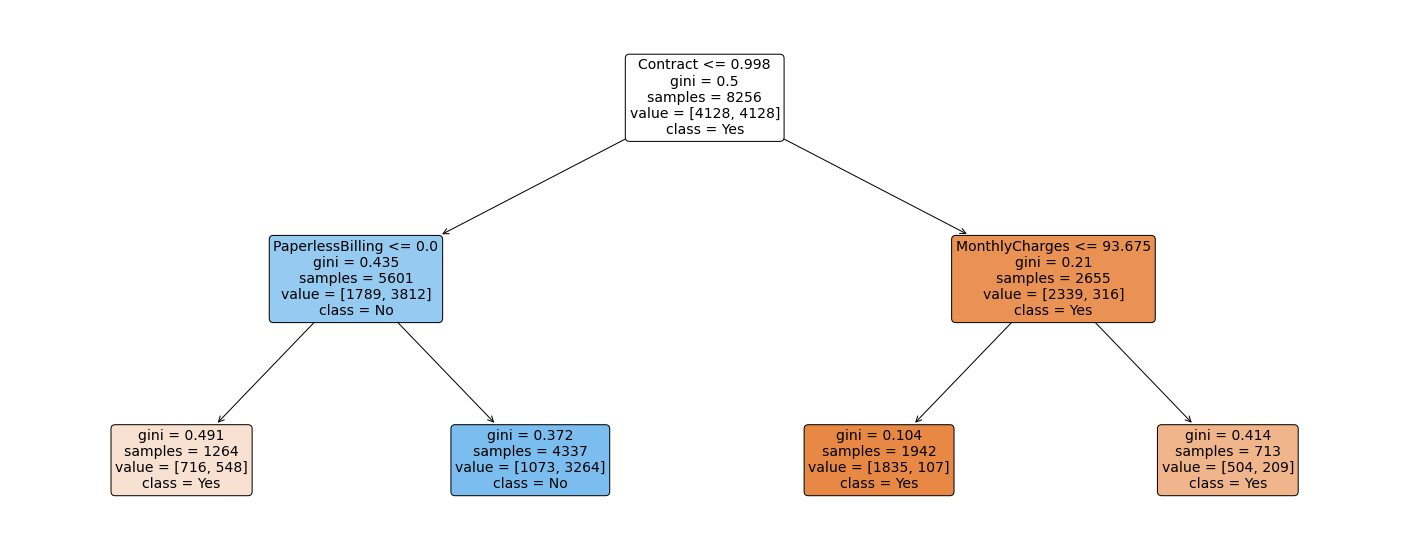

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
a = plot_tree(dt, 
              feature_names=X_train_o.columns, 
              class_names=['Yes','No'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

Let's go to the first node. There the first question decision tree asked is whether Contract<=0.998 . Gini greater than 0 tells a node is impure i.e, it contains different classes. 0.5 here means it contains equal number of different classes. It is evident from the next two lines where it denotes there are total 8256 data points with equal 4128 'Yes' and 4128 'No' values. class here donotes prediction for that node. 

For those samples where above answer is true the tree will ask left question in next layer/depth i.e, whether PaperlessBilling<=0 . Else it will ask the question whether MonthlyCharges<=93.675 . 

Same manner if PaperlessBilling<=0 is True, it predicts the class for those samples as 'Yes' and 'No' for the other samples. 

Note we have trained the tree to with max_depth =2 so only 2 layers are present in the tree.

**Decision tree** is a single tree and prone to **overfitting**. But to **interpret** it's results using a beautiful tree diagram as above, Decision tree is the best choice. But if the choice is more towards higher accuracy, other comples models like **RandomForest, Catboost, XGBoost** can be used. They are **ensemble of many trees**. So it's not possible to plot visually the predictions of each tree. So you might not get a good interpretable diagram there(**low interpretebility**) but will have **better models**.

We will use **Random Forest Classifier** below.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=32)
rf.fit(X_train_o,y_train_o)
pred_test=rf.predict(X_test)
pred_train=rf.predict(X_train_o)
print('Training Accuracy {}'.format(accuracy_score(y_train_o,pred_train)))
print('Testing Accuracy {}'.format(accuracy_score(y_test,pred_test)))

Training Accuracy 0.9981831395348837
Testing Accuracy 0.7934705464868701


In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1046
         Yes       0.61      0.53      0.57       363

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



Note that after using random forest classifier, the accuracy increased from 0.7267 to 0.7934 . But let me also warn that the difference between training and testing accuracy increased so their is a clear sign of overfitting, we can take that into account using other sophisticated ML model and by fine hyperparameter tuning.

Also note that the **precision** for **'Yes'** class have increased though the **recall** for that decreased and f1-score or F-score increased for both classes.

**In summary the random forest model is not much better than decision tree model. Need some hyperparameter tuning.**

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=32, verbose=0,
                       warm_start=False)

All those thing aboce like **max_depth, max_samples** etc are all hyperparameters of the model and **tuning them**(changing them to see which value gives better model) should be done **manually and carefully** to get **good model.**

**Grid Search** is an effective methods of hyper-parameter tuning where a serach is made by taking combination of every element of one set of values for each hyperparameter with every other elements of other sets and come out with the combination giving best accuracy.

We will perform here **Randomized Search** which will randomly pick up some elements from sets. It is because if we choose every combination of elements then thwn it will be **computationally very heavy** and would take **long time** to perform.

If our Manager **don't give us much time** to do our analysis, Randomized Search is better option than GridSearch.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':[None,1,2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,3,4,5,8,10,15,20,30,40,50,60,75,90,120],'max_features':['auto',0.2,0.5,0.7,0.9,0.3,0.4,0.6]}
random_search=RandomizedSearchCV(rf,params)
random_search.fit(X_train_o,y_train_o)
best_hyperparams=random_search.best_params_
best_hyperparams

{'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 3}

In [ ]:
best_model=random_search.best_estimator_
pred=best_model.predict(X_test)
pred_train=best_model.predict(X_train_o)
print('Training Accuracy {}'.format(accuracy_score(y_train_o,pred_train)))
print('Testing Accuracy {}'.format(accuracy_score(y_test,pred)))

Training Accuracy 0.8991036821705426
Testing Accuracy 0.7906316536550745


The difference between training and testing error reduced a lot so overfitting is reduced, which is good. The precision values are almost same(changed by 4 points), **recall** value improved a lot for '**Yes**' class and **f1-score** also improved for '**Yes**' . So indeed hyperparameter tuning by Randomized Search gave us a **better model** !!

In [ ]:
# Suppose new customer data is obtained and we want to predict for him or we manipulate/tweak the data/values of features or understand our features well we just 
# have to put the values in predict method and we will get our target
best_model.predict([[1,0,0,1,17,1,1,1,2,0,1,1,2,1,2,0,1,18.98,200]])

array(['No'], dtype=object)

In [ ]:
 # Somtimes our model needs to be saved for future use.
 import pickle
 file='best_rf_model.pkl'
with open(file, 'wb') as file:  
    pickle.dump(best_model, file)

In [ ]:
# load saved model and make prediction with it
with open('best_rf_model.pkl', 'rb') as file:  
    rf_model = pickle.load(file)
rf_model.predict([[1,0,0,1,17,1,1,1,2,0,1,1,2,1,2,0,1,18.98,200]])

array(['No'], dtype=object)

We can view how important is one feature in prediction for our Random Forest Classifier by the barplot below. It is created with features in descending order of importance. We see that Contract has the highest contribution in predicting churns followed by OnlineSecurity and then others.

The importance of features is calculated based on **Gini impurity/information gain (entropy)** for classification tasks.

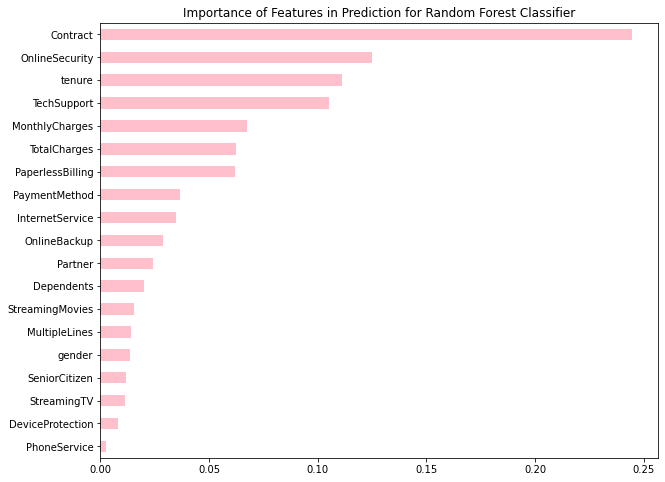

In [ ]:
importance_f=pd.Series(best_model.feature_importances_,index=X_train_o.columns)
sort_imp_f=importance_f.sort_values()
sort_imp_f.plot(kind='barh',color='pink',figsize=(10,8),title='Importance of Features in Prediction for Random Forest Classifier')

Another method of observing the importance of features in prediction is by **Variable Importance via Permutation**. Here we simply swap(permute) values of a column between different rows and then use these modified cases for prediction.We can compare the accuracy with original model to evaluate the importance of model.

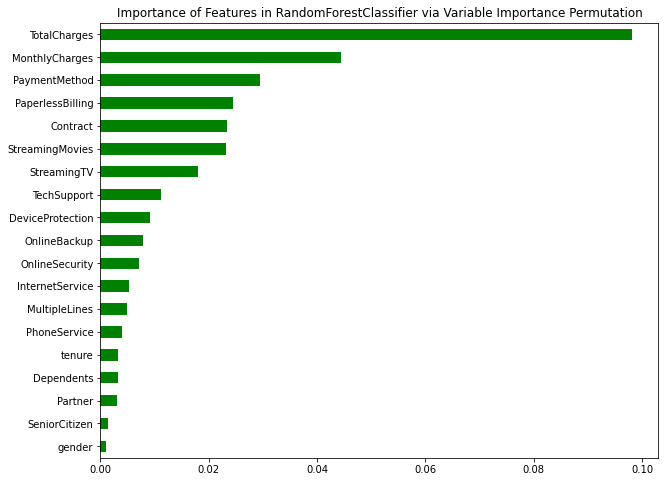

In [ ]:
import pandas as pd
from mlxtend.evaluate import feature_importance_permutation
imp_val,_=feature_importance_permutation(predict_method=best_model.predict,X=np.array(X_train_o),y=np.array(y_train_o),metric='accuracy',num_rounds=1,seed=2)
varimp=pd.DataFrame(index=X_test.columns)
#varimp.index=X_test.columns
varimp['importance']=sorted(imp_val)
varimp.plot(kind='barh',color='green',figsize=(10,8),title='Importance of Features in RandomForestClassifier via Variable Importance Permutation',legend=False)

Here we will consider those features to be important for model prediction which has attained top ranks in both the barplots. **Contract**, **PaperlessBilling**, **Monthly Charges**, **TotalCharges** are the features  helping greatly in prediction. On the other hand, **SeniorCitizen**, **gender** etc are not that important features as they occupy near-bottom positions.

This steps of finding and analyzing important features for Churn Prediction Model is essential to understand the potent causes of churn. Good observation and analysis of the both plot is necessary to get the important and unimportant features.

# In-Depth Customerwise(Individual Customer) Analysis

![alt text](https://drive.google.com/uc?id=1gkOk6ZWBs7N8grQKZ87e34FNszVsfXmE)

In the above fig, we plot MonthlyCharges(X-axis) vs tenure(Y-axis). Our focus will be to bring all the customers to 1st Quadrant(Long Tenure, High Package). Our main focus should be on people with Short Tenure, Low Package. It is because, people there are not our old customers(short tenure) and have not enough faith or need to subscribe big package. So we need to give them good service and discounts/offers to gain their faith/trust and prevent churn-out and make them our long term customers. We need to shift them from 3rd to 1st quadrant.

Then we focus on 4th quadrant or short term, high package. They have shown courage to subscribe to expensive package so we should maintain their trust by giving them good service so they don't churn out.

Lastly for 2nd quadrant(long tenure, low package) we need to keep giving good service and may come up with offers specific to them to attract them towards taking on larger/ expensive subscription. Offers/benefits include, club membership, festival discounts, year-end party for members, free services etc.

In [ ]:
# Plotting our customers as discussed above
import plotly.express as px
fig = px.scatter(df_c[df_c['Churn']=='Yes'],x='MonthlyCharges',y='tenure',template='plotly_white',hover_name='customerID',title='Customer Analysis Plot')
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=60,
            y0=0,
            x1=60,
            y1=75,
            line=dict(
                color="Black",
                width=1
            )
))

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=0,
            y0=35,
            x1=120,
            y1=35,
            line=dict(
                color="Black",
                width=1
            )
))
fig.show()

In [ ]:
# We get the index and ID of all the customers who are in the Short Tenure, Low Package quadrant
len(X_test.index)
for i in range(len(X_test.index)):
  if (df_c.iloc[X_test.index[i],-1]=='Yes' and df_c.iloc[X_test.index[i],5]<35 and df_c.iloc[X_test.index[i],-3]<60):
    print(df_c.iloc[X_test.index[i],0],X_test.index[i])

4895-TMWIR 385
6366-ZGQGL 272
9117-SHLZX 964
3900-AQPHZ 772
7853-GVUDZ 4959
5707-ORNDZ 4842
4678-DVQEO 783
2962-XPMCQ 4764
4800-VHZKI 408
4959-JOSRX 258
0426-TIRNE 3499
3334-CTHOL 1383
2955-PSXOE 5049
4193-ORFCL 1891
7580-UGXNC 3374
0587-DMGBH 3188
3097-NNSPB 1071
5087-SUURX 5565
5669-SRAIP 1053
6861-OKBCE 5099
2219-MVUSO 3539
8280-MQRQN 4455
2898-LSJGD 3877
8305-VHZBZ 2033
1794-HBQTJ 5603
0991-BRRFB 3911
5515-IDEJJ 5388
0761-AETCS 2096
7854-FOKSF 2427
0841-NULXI 1144
2565-JSLRY 4005
1699-HPSBG 7021
0067-DKWBL 687
2187-LZGPL 4311
5016-ETTFF 3318
7619-ODSGN 2185
4349-GFQHK 2116
3506-LCJDC 4520
7845-URHJN 5215
4667-OHGKG 5585
2833-SLKDQ 1249
3683-QKIUE 4213
1449-XQEMT 4941
2108-YKQTY 3408
1251-KRREG 235
6214-EDAKZ 3019
7951-QKZPL 5947
1493-AMTIE 5615
1324-NLTJE 5972
8229-TNIQA 3479
7083-YNSKY 4468
5356-RHIPP 4098
0516-VRYBW 1780
4484-CGXFK 3016
2737-WFVYW 6703
7812-FZHPE 5670
4211-MMAZN 4721
0420-BWTPW 1944
5876-HZVZM 6893
9907-SWKKF 3185
7825-GKXMW 3674
5378-IKEEG 4924
2391-SOORI 3743
2

The accuracy, precision, recall etc. gives overall performance of the model. Sometimes we need to what influenced the model for a **specific customer**. Eg: if the model has predicted a particular customer as churn given the data about him, we want to know what are the reasons/features for which the customer might churn. So here we are specifically interested on that person only.

Sometimes in business, we need to analyse a particular client of ours for business needs. 

**LIME(Locally Interpretable Model-Agnostic Explanations)** technique is suitable for such task. 

In [ ]:
!pip install lime

In [ ]:
# Viewing the prediction result for a particular customer
from lime.lime_tabular import LimeTabularExplainer
lime_explainer=LimeTabularExplainer(np.array(X_train_o),feature_names=X_train_o.columns,class_names=['Yes','No'],mode='classification')
ex=lime_explainer.explain_instance(X_test.iloc[1053,:],best_model.predict_proba,num_features=19)
ex.show_in_notebook()

The above output have 3 figures. The first figure depicts that the output will be **'Yes' with 69% probability**.

The 2nd plot depicts the weight of each feature in prediction. Eg: **PaperlessBilling value greater than 0** for this customer has 0.17 weight to drive the prediction towards 'No'. Again **tenure>49** has 0.04 weight in driving the prediction towards 'Yes class.

The 3rd figure shows the values of a feature for that particular customer given in the dataframe. Color-coding denotes which feature has driven the prediction in which direction.

So LIME is a very useful package in churn analysis, where it tells :
1. For a individual customer, what is the probability of him in falling in the each classes.

2. Which features drives the prediction for him in the direction of which class and with what weight.

3. Feature values given in the dataframe in color-coded format.

# Conclusion

**Analyzing customer reviews and ratings** provided by customer can give valuable insights to improve service.

*Unfortunately this dataset does not have reviews and ratings.* But we can analyze customer reviews with **Sentiment Analysis techniques** and obtain specific details where our product/service is failing.

Ratings of customer satisfaction can be analysed using a metric called **NPS or Net Promoter Scale**. Here first you collect ratings from customer in scale of 1-10.

Customers then are categorized into one of the following categories:

**a. Detractors-**Those who give ratings from 0-6. Unhappy customer. They have a high probability to churn, also spread negative feedbacks pursuading others to churn.

**b. Passives-** 7-8 rating givers. Pleased with our product but not promoting much. We can target them to give them more and more better service and opportunities (discounts) possible to build complete trust with them to make them churn-free and pursuade them to spread good words about the producr.

**c. Promoters-** 9-10 rating givers. Almost churn-free and spreaders of good words about our product.

**NPS = % of Promoters - % of Detractors**

So range of NPS is **-100% to 100%**. Higher the better.